In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# 1.2 Filtered Boston housing and kernels

## 1.2.4: Baseline vs full linear regression

In [3]:
def get_train_test_data():
    df = pd.read_csv("boston_data.csv")
    df_train = df.sample(frac=2.0/3)
    df_test = df.drop(df_train.index)

    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    X_train = df_train.drop("MEDV", axis=1).to_numpy()
    y_train = df_train["MEDV"].to_numpy()

    X_test = df_test.drop("MEDV", axis=1).to_numpy()
    y_test = df_test["MEDV"].to_numpy()

    return X_train, y_train, X_test, y_test

### Part (a) - Linear regression with constant function.

In [4]:

def constant_regression():
    """Fits a constant to the data set using linear regression"""

    mse_train_values = []
    mse_test_values = []

    for _ in range(20):

        X_train, y_train, X_test, y_test = get_train_test_data()

        m_train, m_test = len(X_train), len(X_test)

        phi_train = np.ones(m_train).reshape(-1, 1)

        a = np.linalg.lstsq(phi_train, y_train)[0] # best fit constant
        mse_train = (1.0/m_train) * np.linalg.norm(np.dot(phi_train, a) - y_train)**2
        mse_train_values.append(mse_train)

        phi_test = np.ones(m_test).reshape(-1, 1)

        mse_test = (1.0/m_test) * np.linalg.norm(np.dot(phi_test, a) -  y_test)**2
        mse_test_values.append(mse_test)

    return np.mean(mse_train_values), np.std(mse_train_values), np.mean(mse_test_values), np.std(mse_test_values)


mse_train, std_train, mse_test, std_test = constant_regression()
print(f"MSE train: {mse_train}")
print(f"STDEV train: {std_train}")
print(f"MSE test:  {mse_test}")
print(f"STDEV test: {std_test}")

MSE train: 84.5739111553329
STDEV train: 4.5888548298584055
MSE test:  84.31590279652217
STDEV test: 9.265674250559599


### Part (c) - Linear regression with a single attribute

In [ ]:

def single_attribute_regression(index):
    """Does linear regression with a bias term with a single attribute given by the index. """
    
    mse_train_values = []
    mse_test_values = []

    for _ in range(20):

        X_train, y_train, X_test, y_test = get_train_test_data()
        m_train, m_test = len(X_train), len(X_test)

        X_train = X_train[:, index]
        phi_train = np.column_stack((X_train, np.ones_like(X_train)))
        

        X_test = X_test[:, index]
        phi_test = np.column_stack((X_test, np.ones_like(X_test)))

        w = np.linalg.lstsq(phi_train, y_train)[0] # best fit weight vector
        mse_train = (1.0/m_train) * np.linalg.norm(np.dot(phi_train, w) - y_train)**2
        mse_train_values.append(mse_train)

        mse_test = (1.0/m_test) * np.linalg.norm(np.dot(phi_test, w) -  y_test)**2
        mse_test_values.append(mse_test)

    return np.mean(mse_train_values), np.std(mse_train_values), np.mean(mse_test_values), np.std(mse_test_values)


for i in range(12):
    print(f"Regressing on variable {i+1}")
    mse_train, std_train, mse_test, std_test = single_attribute_regression(i)
    print(f"MSE train: {mse_train}")
    print(f"STDEV train: {std_train}")
    print(f"MSE test:  {mse_test}")
    print(f"STDEV test: {std_test}")
    print("\n\n")


Regressing on variable 0
MSE train: 72.38436604724424
STDEV train: 4.790328788125276
MSE test:  70.90208277925771
STDEV test: 9.654937065225253



Regressing on variable 1
MSE train: 72.95413402117478
STDEV train: 4.620645383966552
MSE test:  74.93555660091674
STDEV test: 9.133420534850227



Regressing on variable 2
MSE train: 62.85514035834709
STDEV train: 4.776338601101876
MSE test:  68.72578639354167
STDEV test: 9.732260110403875



Regressing on variable 3
MSE train: 81.75514678912276
STDEV train: 4.4399243412388065
MSE test:  82.55406815695616
STDEV test: 8.945438274108922



Regressing on variable 4
MSE train: 68.80962933729627
STDEV train: 5.552235704719517
MSE test:  69.7525174329256
STDEV test: 10.956354856813318



Regressing on variable 5
MSE train: 43.027218092090756
STDEV train: 3.4160967778094777
MSE test:  45.307006751993484
STDEV test: 7.009794490068797



Regressing on variable 6
MSE train: 70.79059845282599
STDEV train: 5.66601126413522
MSE test:  76.28047870443383
S

### Part (d) - Linear regression with all variables

In [6]:
def all_attributes_regression():
    """Does linear regression with a bias term with a single attribute given by the index. """
    
    mse_train_values = []
    mse_test_values = []

    for _ in range(20):

        X_train, y_train, X_test, y_test = get_train_test_data()
        m_train, m_test = len(X_train), len(X_test)
        phi_train = np.column_stack((X_train, np.ones(m_train)))

        w = np.linalg.lstsq(phi_train, y_train)[0] 
        mse_train = (1.0/m_train) * np.linalg.norm(np.dot(phi_train, w) - y_train)**2
        mse_train_values.append(mse_train)

        phi_test = np.column_stack((X_test, np.ones(m_test)))
        mse_test = (1.0/m_test) * np.linalg.norm(np.dot(phi_test, w) -  y_test)**2
        mse_test_values.append(mse_test)
    
    return np.mean(mse_train_values), np.std(mse_train_values), np.mean(mse_test_values), np.std(mse_test_values)

mse_train, std_train, mse_test, std_test = all_attributes_regression()

print(f"MSE train: {mse_train}")
print(f"STDEV train: {std_train}")
print(f"MSE test:  {mse_test}")
print(f"STDEV test: {std_test}")


MSE train: 22.5396614896969
STDEV train: 1.6648445229787823
MSE test:  23.650252962618353
STDEV test: 3.7222994219697387


# 1.3.5 Filtered Boston housing and kernels

In [7]:
class KRR:

    def __init__(self, X_train, y_train):
        self.pairwise_norm = self._get_pairwise_norm(X_train)
        self.X_train = X_train
        self.y_train = y_train
        
    def _get_pairwise_norm(self, X_train):
        m = len(X_train)
        M = np.zeros((m, m))
        for i in range(m):
            for j in range(m):
                M[i, j] = np.linalg.norm(X_train[i] - X_train[j])
        return M

    def get_alpha(self, gamma, sigma):
        m = len(self.y_train)
        K = np.exp(-((self.pairwise_norm/sigma)**2)/2.0)
        M = K + gamma * m * np.identity(m)
        alpha = np.linalg.solve(M, self.y_train)
        return alpha
        
    def predict(self, X_test, gamma, sigma):
        alpha = self.get_alpha(gamma, sigma)
        diff = self.X_train[:, None, :] - X_test[None, :, :] # diff[i][j] = X_train[i] - X_test[j]
        norms = np.linalg.norm(diff, axis=2) # norms[i][j] = ||X_train[i] - X_test[j]||

        k = np.exp(-((norms/sigma)**2)/2)

        y_preds = np.dot(alpha, k) # dots alpha with each column of norms

        return y_preds

    def get_mse(self, X_test, y_test, gamma, sigma):
        y_preds = self.predict(X_test, gamma, sigma)
    
        return (np.linalg.norm(y_preds - y_test)**2)/len(X_test)        

### Part (a) - Hyperparameter optimisation of sigma and gamma

In [28]:
def get_cross_validation_error(folds_X, folds_y, gamma, sigma):

    num_folds = len(folds_X)

    errors = []

    for i in range(num_folds):
        fold_X_test = folds_X[i]
        fold_y_test = folds_y[i]
        fold_X_train = np.concatenate([folds_X[j] for j in range(num_folds) if j != i])
        fold_y_train = np.concatenate([folds_y[j] for j in range(num_folds) if j != i])
        krr = KRR(fold_X_train, fold_y_train)
        errors.append(krr.get_mse(fold_X_test, fold_y_test, gamma, sigma))

    return np.mean(errors)


def get_best_params(X_train, y_train, gammas, sigmas):
    """Gets the best pair of values (gamma, sigma) to use for ridge regression.
    by doing five-fold validation on the given training data."""

    num_folds = 5
    
    folds_X = np.array_split(X_train, num_folds)
    folds_y = np.array_split(y_train, num_folds)

    min_cross_error = np.inf

    best_gamma, best_sigma = 0, 0

    errors = np.zeros(shape=(len(gammas), len(sigmas))) # errors[i][j] = cross validation error using gammas[i] and sigmas[j]

    for i, gamma in enumerate(gammas):
        for j, sigma in enumerate(sigmas):
            cross_error = get_cross_validation_error(folds_X, folds_y, gamma, sigma)
            if cross_error < min_cross_error:
                min_cross_error = cross_error
                best_gamma, best_sigma = gamma, sigma
            
            errors[i][j] = cross_error

    return best_gamma, best_sigma, errors

def kernelised_ridge_regression():
    """Does kernelised ridge regression using best gamma and sigma values found from cross-fold validation."""

    gammas = 2.0 ** np.arange(-40, -25)
    sigmas = 2.0 ** np.arange(7.0, 13.1, 0.5)

    def get_mses():

        X_train, y_train, X_test, y_test = get_train_test_data()

        gamma, sigma, _ = get_best_params(X_train, y_train, gammas, sigmas)

        krr = KRR(X_train, y_train)

        mse_train = krr.get_mse(X_train, y_train, gamma, sigma)

        mse_test = krr.get_mse(X_test, y_test, gamma, sigma)

        print(mse_train, mse_test)

        return mse_train, mse_test
    
    
    mses = [get_mses() for _ in range(20)]
    mse_lists = list(zip(*mses))

    mse_train_values, mse_test_values = mse_lists[0], mse_lists[1]
    
    return np.mean(mse_train_values), np.std(mse_train_values), np.mean(mse_test_values), np.std(mse_test_values)

kernelised_ridge_regression()

6.351373035575883 14.378041714919933
2.5171752071518005 20.395095941693796
10.091951664930273 8.582344406903735
7.473038447074029 105.44367340147161
7.714035560702856 12.112646432286214
8.85016182257817 10.65744476561262
6.702681945523534 15.733384485600213
7.041943483488121 11.307405053918194
8.680344475163492 10.94537274704725
7.350267154500969 10.980888129960656
5.445235683950308 13.202163337846283
8.509053276597918 11.690995510981185
10.503049898291549 8.177810513660775
8.851863611509518 9.814701693541569
8.958205227846737 10.568868875671873
8.60118306316615 14.009303575509495
9.808025368082543 12.405088362233966
8.467173459016914 11.37667037220092
4.528121439756328 34.56305645805154
9.15831469216751 9.788267018804703


(np.float64(7.780159925853731),
 np.float64(1.9065214314035248),
 np.float64(17.80666113989583),
 np.float64(20.862786760763058))

### Part (b) - Plot of cross-validation error for different values of sigma and gamma

In [18]:
# get best here and plot in this cell then without calling again use best values to fgind test and train mse values 
X_train, y_train, X_test, y_test = get_train_test_data()

gammas = 2.0 ** np.arange(-40, -25)
sigmas = 2.0 ** np.arange(7.0, 13.1, 0.5)

gamma, sigma, errors = get_best_params(X_train, y_train, gammas, sigmas)

print(f"Best gamma: {gamma}")
print(f"Best sigma: {sigma}")

Best gamma: 3.725290298461914e-09
Best sigma: 724.0773439350247


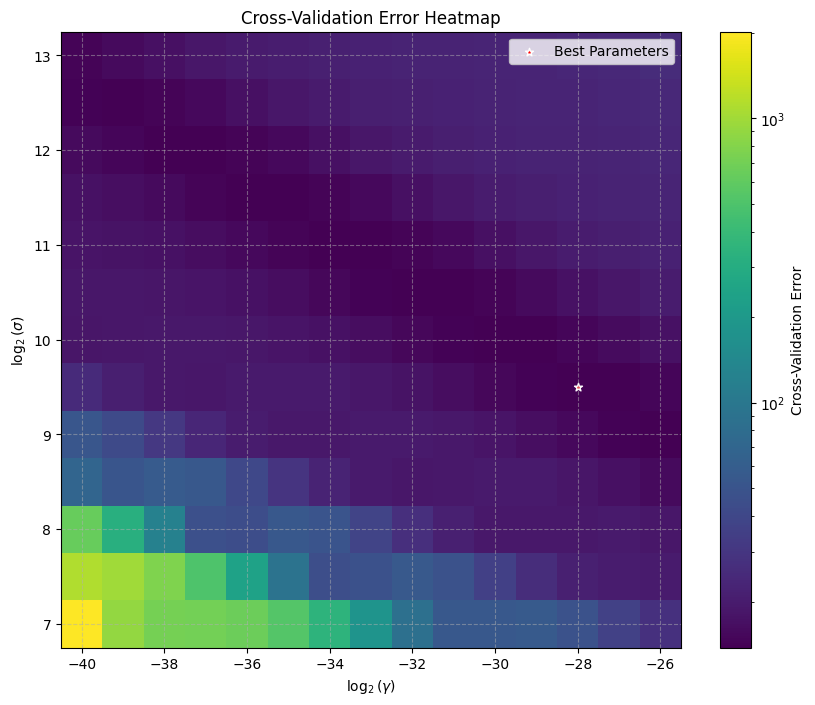

In [19]:
import matplotlib.colors as colors

# plotting log of gammas and sigmas for better visualisation
gammas_log = np.arange(-40, -25)      
sigmas_log = np.arange(7.0, 13.1, 0.5) 

min_error = np.min(errors)
max_error = np.max(errors)
norm_log = colors.LogNorm(vmin=min_error, vmax=max_error) # makes colour scale logarithmic for clearer view

xx, yy = np.meshgrid(gammas_log, sigmas_log, indexing='ij')

plt.figure(figsize=(10, 8))

plot = plt.pcolormesh(xx, yy, errors, cmap='viridis', shading='nearest', norm=norm_log)

cbar = plt.colorbar(plot, label='Cross-Validation Error')
plt.xlabel('$\\log_2(\\gamma)$')
plt.ylabel('$\\log_2(\\sigma)$')
plt.title('Cross-Validation Error Heatmap')

plt.scatter(np.log2(gamma),  np.log2(sigma), marker='*', c='red', edgecolor='white', linewidth=1, label='Best Parameters')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)


### Part (c) - Test/train MSE for best sigma and gamma

In [20]:
krr = KRR(X_train, y_train)

mse_train = krr.get_mse(X_train, y_train, gamma, sigma)
mse_test = krr.get_mse(X_test, y_test, gamma, sigma)

print(f"MSE train: {mse_train}")
print(f"MSE test: {mse_test}")

MSE train: 10.078160310150828
MSE test: 13.285633608555363


### Part (d) - Test/train MSE for all the above methods averaged for 20 runs!

In [1]:
mse_train, std_train, mse_test, std_test = constant_regression()
print("Naive regression")
print(f"MSE train: {mse_train.round(2)} ± {std_train.round(2)}")
print(f"MSE test:  {mse_test.round(2)} ± {std_test.round(2)}")

for i in range(12):
    print("\n")
    print(f"Linear Regression (attribute {i+1})")
    mse_train, std_train, mse_test, std_test = single_attribute_regression(i)
    print(f"MSE train: {mse_train.round(2)} ± {std_train.round(2)}")
    print(f"MSE test:  {mse_test.round(2)} ± {std_test.round(2)}")

print("\n")
print(f"Linear Regression (all attributes)")
mse_train, std_train, mse_test, std_test = all_attributes_regression()
print(f"MSE train: {mse_train.round(2)} ± {std_train.round(2)}")
print(f"MSE test:  {mse_test.round(2)} ± {std_test.round(2)}")

print("\n")
print("Kernel Ridge Regression")
mse_train, std_train, mse_test, std_test = kernelised_ridge_regression()
print(f"MSE train: {mse_train.round(2)} ± {std_train.round(2)}")
print(f"MSE test:  {mse_test.round(2)} ± {std_test.round(2)}")
    
    


NameError: name 'constant_regression' is not defined